
# Telicomminication Customer Churn 
# Milestone 1: Data Preparation & EDA

In [14]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For data visualization

# Make tables easier to read
pd.set_option("display.max_columns", 100) # Display up to 100 columns in output
pd.set_option("display.width", 120) # Set display width to 120 characters

#By default, pandas sometimes hides columns or wraps output.
#This makes it easier to see all your columns when printing the dataframe.


In [2]:
# Define the path to the data file
DATA_PATH = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # This is the filename of the dataset
# Read the CSV file into a pandas DataFrame

df = pd.read_csv(DATA_PATH) # pd.read_csv() is a pandas function that reads comma-separated values files

# Print basic information about the loaded data
print("Loaded file:", DATA_PATH) # Shows which file was loaded
print("Shape (rows, columns):", df.shape)  # df.shape returns a tuple with (number_of_rows, number_of_columns)

# look at the data
df.head() #shows the first 5 rows to get a quick view for the data.


Loaded file: WA_Fn-UseC_-Telco-Customer-Churn.csv
Shape (rows, columns): (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display comprehensive information about the DataFrame
df.info() # This method prints:
           # - The data type of each column
           # - Number of non-null values in each column
           # - Memory usage of the DataFrame
           # - Total number of rows and columns

missing_counts = df.isna().sum().sort_values(ascending=False) # Calculate missing values in each column
# df.isna() - Creates a boolean mask (True where values are missing)
# .sum() - Counts True values (missing data) for each column
# .sort_values(ascending=False) - Sorts columns by missing count (highest first)

print("\nMissing values per column (NA-based):\n", missing_counts) # Print the missing values summary and the \n creates newlines for better readability in output
#"\n" → This is a newline character.
#"Missing values per column (NA-based):" → This is just a label so you know what the numbers mean.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Clean and prepare the data 

# Clean all text columns (remove whitespace)
#finds all columns that have type object
text_cols = df.select_dtypes(include=["object"]).columns #text_cols is a list of all the text column names in the dataset.
for col in text_cols: #loop over every text column.
    df[col] = df[col].astype(str).str.strip()  # Convert to string and remove extra spaces

# for example sometimes text data has extra spaces (like " Yes" instead of "Yes"), which can cause mismatches in analysis.
# for example Sometimes a column might have mixed types (e.g., strings and numbers). For example, "123" and 123 might be in the same column. Converting to str makes everything consistent.

#  Convert TotalCharges to numeric (if column exists)
if "TotalCharges" in df.columns:
    # Convert to number, turn errors into NaN 
    # Even though TotalCharges should be a number, sometimes it’s read as text.
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")  # converts values to numbers.

#errors="coerce" → if something can’t be converted (e.g., a blank " " or "N/A"), Pandas will replace it with NaN instead of throwing an error.
#This is important because even if TotalCharges looks like numbers, it might be stored as text (strings), which prevents math operations.
 
    # Fill missing values with median
    #Chosen over mean because of more robust to outliers and Better preserves the original distribution
    if df["TotalCharges"].isna().sum() > 0: #This checks if there are any missing values after the conversion.
        median_val = df["TotalCharges"].median()
        df["TotalCharges"] = df["TotalCharges"].fillna(median_val)
        print(f"Filled {df['TotalCharges'].isna().sum()} missing values with median {median_val:.2f}") 
#Prints how many missing values were filled, and what median value was used.
#:.2f formats the median to 2 decimal places.

Filled 0 missing values with median 1397.47


In [5]:

# Drop exact duplicate rows if any
# Check 'customerID' uniqueness (informational)

dupe_count = df.duplicated().sum()
# df.duplicated() returns a boolean series (True for duplicate rows)
# .sum() counts the True values (total duplicates)

print("Duplicate full-rows found:", dupe_count)
if dupe_count > 0:
    df = df.drop_duplicates() # Remove duplicate rows (keeps first occurrence)
    print("Duplicates dropped. New shape:", df.shape)

if "customerID" in df.columns: # Check for unique customer IDs (business key validation)
    unique_customers = df["customerID"].nunique()  # Verify column exists first # Count distinct customer IDs
    print(f"Unique customerIDs: {unique_customers} out of {len(df)} rows") #nunique() counts how many distinct values are in the column.
#If this number is less than the total number of rows (len(df)), it means some customers appear more than once (duplicates).

else:
    print("Column 'customerID' not found")


Duplicate full-rows found: 0
Unique customerIDs: 7043 out of 7043 rows


In [6]:
# Create a numeric churn flag while preserving the original categorical column
# This is useful because:
# 1) 'Churn' (Yes/No) remains human-readable for analysis
# 2) 'Churn_Flag' (1/0) enables mathematical operations and modeling

if "Churn" in df.columns: # First verify the column exists
      # Create new numeric column using map function
    df["Churn_Flag"] = df["Churn"].map({"Yes": 1, "No": 0}).astype(int)
    # Breakdown:
    # .map() converts each value according to the dictionary
    # {"Yes": 1, "No": 0} specifies the mapping
    # .astype(int) ensures we get integers (not floats)

#the raw column Churn is text: "Yes" or "No". Models need numbers, not words so, We create a second column Churn_Flag with 1 = churned, 0 = retained, while keeping the original text column for readability in reports/EDA.

    print("Churn value counts:") # Print value counts for verification
    print(df["Churn"].value_counts(dropna=False)) # dropna=False includes null counts if they exist
    print(f"\nOverall churn rate: {df['Churn_Flag'].mean():.2%}") # Calculate and display overall churn rate
# :.2% formats as percentage with 2 decimal places
#Example: if 26.5% of rows are 1, the mean is 0.265 → printed as 26.50%.

else:
    raise ValueError("Expected a 'Churn' column in the dataset.") # Raise error if critical column is missing


Churn value counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Overall churn rate: 26.54%


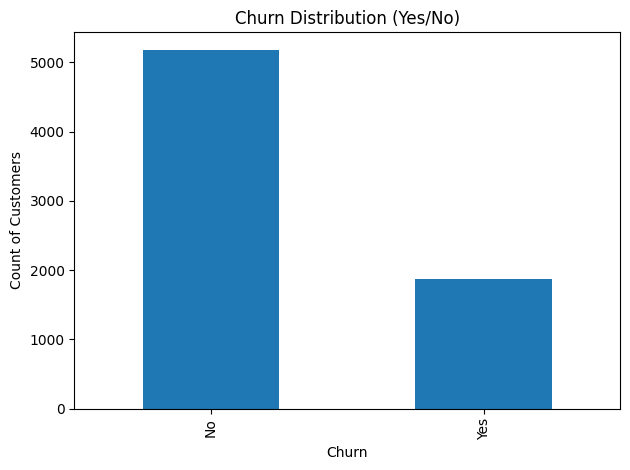

In [7]:
# Create a simple bar chart showing churn distribution

# Get counts of each churn category (Yes/No)
churn_counts = df["Churn"].value_counts() 

#df["Churn"] → selects the column with “Yes”/“No” answers.
#.value_counts() → counts how many times each unique value appears.

# Initialize a new matplotlib figure
plt.figure()  # Creates a blank canvas for our plot

# Create bar plot directly from pandas Series
churn_counts.plot(kind="bar")  # kind='bar' specifies bar chart type
# This uses pandas' built-in plotting (which uses matplotlib underneath)

# Add chart title and labels
plt.title("Churn Distribution (Yes/No)")  # Main title
plt.xlabel("Churn")  # X-axis label (categories)
plt.ylabel("Count of Customers")  # Y-axis label

# Adjust layout to prevent label clipping
plt.tight_layout()  # Automatically adjusts subplot params

# Display the plot
plt.show()  # Renders the visualization

**What bar is showing**

X-axis → The two categories from the Churn column:

"No" → Customers who stayed.

"Yes" → Customers who left (churned).

Y-axis → How many customers are in each category (the count).

So  "No" is much taller than "Yes", it means most customers stayed, and only a smaller portion left.

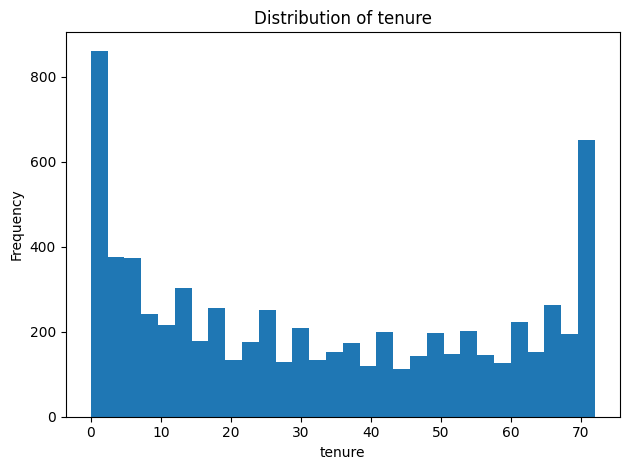

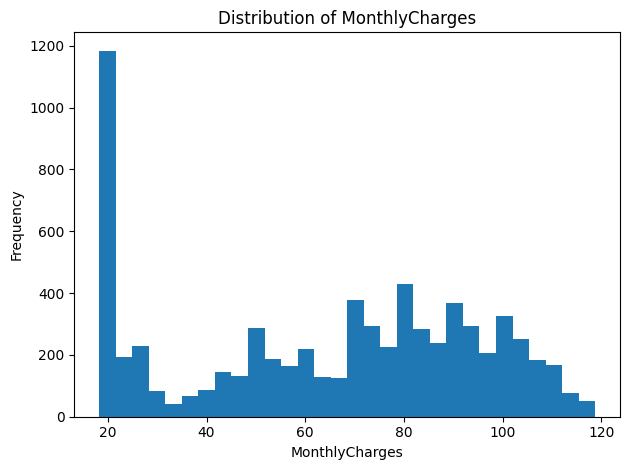

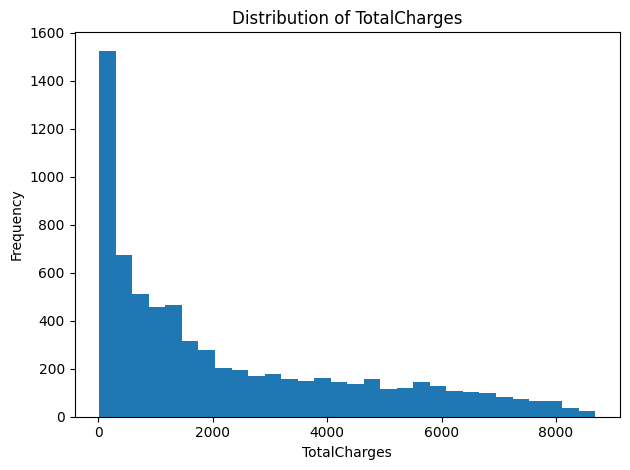

In [8]:

#Numeric features: histograms

# We'll look at distributions of tenure, MonthlyCharges, TotalCharges
#tenure → How long the customer has been with the company (in months)
#MonthlyCharges → How much the customer pays each month
#TotalCharges → Total amount the customer has paid so far

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"] # Columns to analyze
for col in num_cols: # Check if column exists 
    if col in df.columns:
        plt.figure()
        df[col].plot(kind="hist", bins=30) # Create histogram with custom settings , Number of bins
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)  # Add plot labels and title
        plt.ylabel("Frequency")  # Add plot labels and title
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column {col} not found; skipping histogram.")


**What’s on each axis**

**X-axis** 
(bottom) → The range of the feature’s values.

For tenure, this is months as a customer (0 to 72).

For MonthlyCharges, this is dollars per month (about 20 dollars to 120 dollars).

For TotalCharges, this is total dollars paid so far.

**Y-axis** 
(side) → The number of customers who fall into each range.

C:\Users\mamat\AppData\Local\Temp\ipykernel_8208\804281625.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["No Churn", "Churn"])


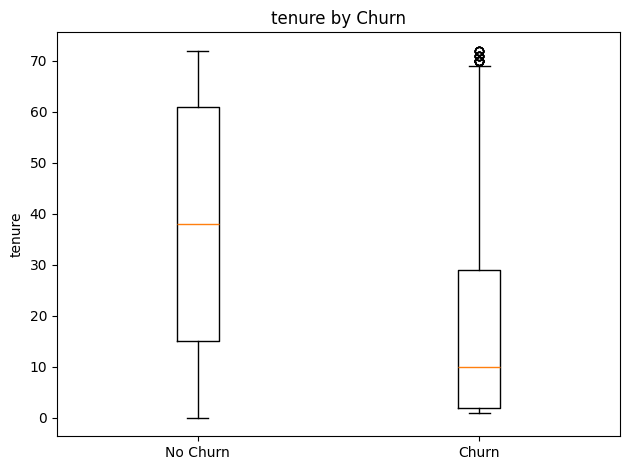

C:\Users\mamat\AppData\Local\Temp\ipykernel_8208\804281625.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["No Churn", "Churn"])


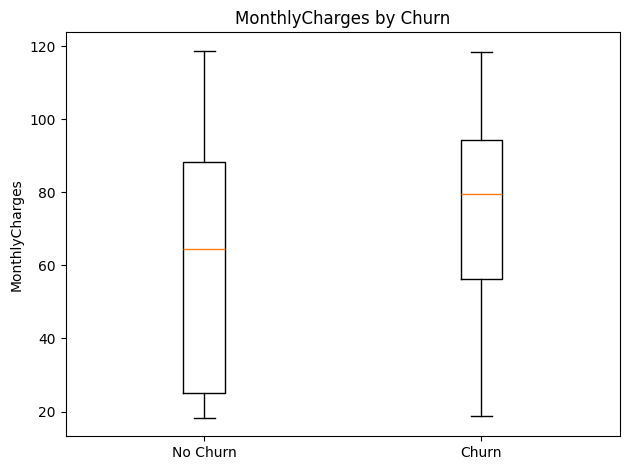

C:\Users\mamat\AppData\Local\Temp\ipykernel_8208\804281625.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no, data_yes], labels=["No Churn", "Churn"])


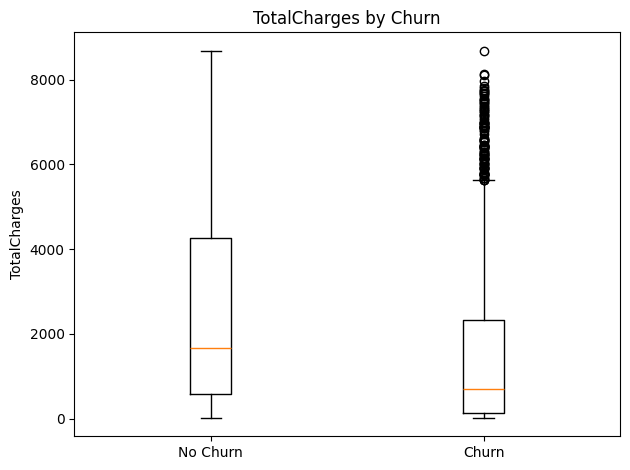

In [9]:

# Numeric features by churn: boxplots
# Compare distributions of numeric features between churn vs no churn

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in num_cols:
    if col in df.columns:
        data_no = df[df["Churn_Flag"] == 0][col].dropna().values
        data_yes = df[df["Churn_Flag"] == 1][col].dropna().values
        plt.figure()
        plt.boxplot([data_no, data_yes], labels=["No Churn", "Churn"]) 
        plt.title(f"{col} by Churn")
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column {col} not found; skipping boxplot.")


**Tenure by Churn**

**Observation**

- No Churn customers have much longer tenure (median ~38 months) than Churn customers (median ~10 months).

- Churn customers tend to leave early, often within the first year.

**Interpretation**

- Early-stage customers are at a higher risk of churning onboarding and early customer experience may be critical.

- Longer-tenure customers are more “loyal” and less likely to leave.

**MonthlyCharges by Churn**

**Observation**

- Churn customers have slightly higher median monthly charges 80 than No Churn customers 65.

- The spread for both groups is similar, but the Churn group skews towards higher monthly bills.

**Interpretation**

- Higher monthly charges might be linked to customers leaving  possibly due to cost sensitivity or dissatisfaction with expensive plans.

- This aligns with churn risk being higher in high-bill segments.

**TotalCharges by Churn**

**Observation**

- No Churn customers generally have higher TotalCharges (median around ~1700) compared to Churn customers (median below ~700).

- The range for No Churn is much wider, with many customers paying several thousand dollars over time.

- Churn customers often have lower total charges, suggesting they leave earlier in their subscription period.

- There are some outliers in the Churn group — customers who churned but had high total charges.

**Interpretation**

- Customers with low TotalCharges might be newer customers who didn’t stay long enough to accumulate high bills.

- Retained customers tend to have stayed longer, hence higher cumulative charges.

**Explanation of Categorical Churn Rate Analysis**
This code is analyzing customer churn rates across different categorical features in a dataset. Here's why we do this:

**Purpose**
The analysis helps identify which customer segments (based on categorical attributes) are most likely to churn (cancel their service). This is valuable for:

Identifying risk factors: Seeing which categories have higher churn rates

Targeted retention: Knowing which customer groups need special attention

Business insights: Understanding how different service aspects relate to churn

**How It Works**
Selected Features: The code examines 12 categorical columns like contract type, internet service, payment method, etc.

Churn Rate Calculation:

For each category (e.g., "Month-to-month" contract), it calculates:

n: How many customers are in that category

churn_rate: What percentage of those customers churned

**Priority Features**

The code first focuses on 3 key features (Contract, InternetService, PaymentMethod)

These are likely known from prior analysis to be important churn predictors

**Business Value**
By seeing churn rates broken down by category, a company can:

Adjust contract terms for high-churn groups

Improve problematic internet service offerings

Modify payment methods that correlate with churn

Develop targeted retention campaigns for at-risk segments

In [10]:
#  Categorical churn rates
# Compute churn % by category for a set of informative categorical columns.

# List of categorical columns we want to analyze for churn patterns
cat_cols = [
    "Contract",          # Type of contract (month-to-month, yearly, etc.)
    "InternetService",   # Type of internet service (DSL, Fiber, etc.)
    "PaymentMethod",     # How customer pays (credit card, bank transfer, etc.)
    "gender",            # Customer's gender
    "SeniorCitizen",     # Whether customer is a senior citizen
    "Partner",           # Whether customer has a partner
    "Dependents",        # Whether customer has dependents
    "PhoneService",      # Whether customer has phone service
    "PaperlessBilling",  # Whether customer uses paperless billing
    "OnlineSecurity",    # Whether customer has online security service
    "OnlineBackup",      # Whether customer has online backup service
    "TechSupport",       # Whether customer has tech support service
]

# Function to calculate churn statistics for a given categorical column
def churn_rate_by_category(frame, col):
    """Return churn count & rate by category for 'col'."""
    
    # First check if the column exists in the dataframe
    if col not in frame.columns:
        return None  # Return None if column doesn't exist
    
    # Perform the analysis:
    out = (frame.groupby(col, dropna=False)  # Group data by the categorical column
                 ["Churn_Flag"]              # Focus on the churn flag column
                 .agg(n="count",             # Count total customers in each category
                      churn_rate="mean")     # Calculate mean (which gives churn rate)
                 .sort_values("churn_rate",  # Sort results by churn rate
                             ascending=False)) # Highest churn rates first
    
    return out  # Return the analysis results

# Main analysis loop - focusing on 3 key features first
for key in ["Contract", "InternetService", "PaymentMethod"]:
    # Calculate churn statistics for the current key feature
    tbl = churn_rate_by_category(df, key)
    
    # Check if the analysis returned results
    if tbl is not None:
        # Print a header for the results
        print(f"\nChurn rate by {key}:")
        # Display the results table (nicely formatted)
        display(tbl)
    else:
        # If column wasn't found, print a message
        print(f"Column '{key}' not found; skipping.")



Churn rate by Contract:


,n,churn_rate
Contract,,
Month-to-month,3875,0.427097
One year,1473,0.112695
Two year,1695,0.028319



Churn rate by InternetService:


,n,churn_rate
InternetService,,
Fiber optic,3096,0.418928
DSL,2421,0.189591
No,1526,0.074050



Churn rate by PaymentMethod:


,n,churn_rate
PaymentMethod,,
Electronic check,2365,0.452854
Mailed check,1612,0.191067
Bank transfer (automatic),1544,0.167098
Credit card (automatic),1522,0.152431


In [11]:

# Pearson correlation coefficients between features and churn.
# Note: Correlation doesn't imply causation, but helps identify potential signals.
#This step is finding which features (columns) have the strongest relationship with churn — both positive (increasing churn likelihood) and negative (reducing churn likelihood).
#It’s an exploratory analysis to guide modeling and business decisions.

# Create one-hot-encoded version of the dataframe:
encoded = pd.get_dummies(
    df.drop(columns=["customerID"], errors="ignore"),  # Remove customer ID column if it exists
    drop_first=True  # Avoid dummy variable trap by dropping first category
)

# Calculate correlation matrix (numeric columns only) and extract Churn_Flag correlations
corr_with_churn = encoded.corr(numeric_only=True)["Churn_Flag"].sort_values(ascending=False)
# Breakdown:
# .corr() - computes pairwise correlation of columns
# numeric_only=True - only considers numeric columns (after one-hot encoding)
# ["Churn_Flag"] - extracts just the correlations with the target variable
# .sort_values(ascending=False) - sorts from highest to lowest correlation

# Extract top 15 positive correlations (features most associated with churn)
top_pos = corr_with_churn.head(15).to_frame("correlation")
# .head(15) - takes the first 15 values (highest correlations)
# .to_frame("correlation") - converts to dataframe with column name "correlation"

# Extract top 15 negative correlations (features most associated with retention)
top_neg = corr_with_churn.tail(15).to_frame("correlation")
# .tail(15) - takes the last 15 values (most negative correlations)

# Display results
print("\nTop positive correlations with Churn_Flag (signals of higher churn):")
display(top_pos)
# Positive correlation means when this feature increases, churn likelihood increases

print("\nTop negative correlations with Churn_Flag (signals of retention):")
display(top_neg)
# Negative correlation means when this feature increases, churn likelihood decreases



Top positive correlations with Churn_Flag (signals of higher churn):


,correlation
Churn_Flag,1.000000
Churn_Yes,1.000000
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
MonthlyCharges,0.193356
PaperlessBilling_Yes,0.191825
SeniorCitizen,0.150889
StreamingTV_Yes,0.063228
StreamingMovies_Yes,0.061382
MultipleLines_Yes,0.040102



Top negative correlations with Churn_Flag (signals of retention):


,correlation
Partner_Yes,-0.150448
Dependents_Yes,-0.164221
TechSupport_Yes,-0.164674
OnlineSecurity_Yes,-0.171226
Contract_One year,-0.177820
TotalCharges,-0.199037
OnlineSecurity_No internet service,-0.227890
StreamingMovies_No internet service,-0.227890
OnlineBackup_No internet service,-0.227890
InternetService_No,-0.227890



**Key points about what this analysis does**

One-hot encoding: Converts categorical variables into binary (0/1) columns so we can calculate correlations

Pearson correlation: Measures linear relationship between -1 (perfect negative) and +1 (perfect positive)

**Interpreting results**

High positive correlation: Feature present → more likely to churn

High negative correlation: Feature present → more likely to stay

Practical use: Helps identify which features might be good predictors for churn prediction models

In [12]:
#Save cleaned dataset for modeling
# We keep the original columns and add 'Churn_Flag' so you're ready for model training.

OUTPUT_PATH = "telco_cleaned.csv"
df.to_csv(OUTPUT_PATH, index=False)
print(f"Saved cleaned dataset to: {OUTPUT_PATH}")


Saved cleaned dataset to: telco_cleaned.csv
